In [1]:
import pandas as pd
path=r'C:\Users\ALEXANDRA\OneDrive\Documentos\2024-2\ASIES\Public-budget\Presupuesto_Provincial.xlsx'
budget=pd.read_excel(path)
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DEPARTAMENTO        196 non-null    object
 1   PROVINCIA           196 non-null    object
 2   EJECUCION_DIC_2024  196 non-null    object
 3   PIM_2024            196 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.3+ KB


In [2]:
budget['EJECUCION_DIC_2024'] = budget['EJECUCION_DIC_2024'].str.replace('%', '').str.strip()

In [3]:
budget['EJECUCION_DIC_2024'] = pd.to_numeric(budget['EJECUCION_DIC_2024'], errors='raise')

In [4]:
print(budget['EJECUCION_DIC_2024'].dtypes)  # Verificar el tipo de la columna
print(budget.head())  # Ver los primeros valores

float64
  DEPARTAMENTO     PROVINCIA  EJECUCION_DIC_2024   PIM_2024
0     AMAZONAS   CHACHAPOYAS                43.8  250830740
1     AMAZONAS         BAGUA                60.9   98874472
2     AMAZONAS       BONGARA                38.1   92073962
3     AMAZONAS  CONDORCANQUI                73.6  114951154
4     AMAZONAS          LUYA                45.7  112388022


In [5]:
budget.isna().any()

DEPARTAMENTO          False
PROVINCIA             False
EJECUCION_DIC_2024    False
PIM_2024              False
dtype: bool

In [6]:
map='https://github.com/SocialAnalytics-StrategicIntelligence/GeoDF_Analytics/raw/main/maps/ProvsINEI2023.zip'
import geopandas as gpd
provmap=gpd.read_file(map)
provmap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    196 non-null    float64 
 1   CCDD        196 non-null    object  
 2   CCPP        196 non-null    object  
 3   DEPARTAMEN  196 non-null    object  
 4   PROVINCIA   196 non-null    object  
 5   geometry    196 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 9.3+ KB


In [7]:
provmap['LOCATION']=['+'.join(x[0]) for x in zip(provmap.iloc[:,3:5].values)]
                     #Combine the 4th and 5th columns into a single string separated by the + symbol
provmap.head()

,OBJECTID,CCDD,CCPP,DEPARTAMEN,PROVINCIA,geometry,LOCATION
0,1.0,01,01,AMAZONAS,CHACHAPOYAS,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",AMAZONAS+CHACHAPOYAS
1,2.0,01,02,AMAZONAS,BAGUA,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",AMAZONAS+BAGUA
2,3.0,01,03,AMAZONAS,BONGARA,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",AMAZONAS+BONGARA
3,4.0,01,04,AMAZONAS,CONDORCANQUI,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",AMAZONAS+CONDORCANQUI
4,5.0,01,05,AMAZONAS,LUYA,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",AMAZONAS+LUYA


In [8]:
budget['LOCATION']=['+'.join(x[0]) for x in zip(budget.iloc[:,:2].values)]
budget.head()

,DEPARTAMENTO,PROVINCIA,EJECUCION_DIC_2024,PIM_2024,LOCATION
0,AMAZONAS,CHACHAPOYAS,43.8,250830740,AMAZONAS+CHACHAPOYAS
1,AMAZONAS,BAGUA,60.9,98874472,AMAZONAS+BAGUA
2,AMAZONAS,BONGARA,38.1,92073962,AMAZONAS+BONGARA
3,AMAZONAS,CONDORCANQUI,73.6,114951154,AMAZONAS+CONDORCANQUI
4,AMAZONAS,LUYA,45.7,112388022,AMAZONAS+LUYA


In [9]:
import unidecode 
byePunctuation=lambda x: unidecode.unidecode(x)
              # Define una función lambda que recibe un texto x y le aplica unidecode.unidecode(x).
              # unidecode.unidecode(x) convierte cualquier carácter especial en su equivalente sin acento
budget['LOCATION']=budget['LOCATION'].apply(byePunctuation) #data covid
provmap['LOCATION']=provmap['LOCATION'].apply(byePunctuation) #data map

In [10]:
budget['LOCATION']=budget.LOCATION.str.replace("\-|\_|\s+","",regex=True)
provmap['LOCATION']=provmap.LOCATION.str.replace("\-|\_|\s+","",regex=True)

In [11]:
nomatch_budget= set(budget.LOCATION)-set(provmap.LOCATION)
nomatch_map= set(provmap.LOCATION)- set(budget.LOCATION)

In [12]:
len(nomatch_budget), len (nomatch_map) # we'll focus on the 2nd one

(7, 7)

In [13]:
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_budget)) for dis in sorted(nomatch_map)]

[('AMAZONAS+UTCUBAMBA', ('AMAZONAS+UCTUBAMBA', 94)),
 ('ANCASH+ANTONIORAYMONDI', ('ANCASH+ANTONIORAIMONDI', 95)),
 ('APURIMAC+COTABAMBAS', ('APURIMAC+COTABAMBA', 97)),
 ('CUSCO+QUISPICANCHI', ('CUSCO+QUISPICANCHIS', 97)),
 ('ICA+NASCA', ('ICA+NAZCA', 89)),
 ('LORETO+MARISCALRAMONCASTILLA', ('LORETO+RAMONCASTILLA', 83)),
 ('PASCO+DANIELALCIDESCARRION', ('PASCO+DANIELA.CARRION', 85))]

In [14]:
{dis:process.extractOne(dis,nomatch_budget) [0] for dis in sorted(nomatch_map)}

{'AMAZONAS+UTCUBAMBA': 'AMAZONAS+UCTUBAMBA',
 'ANCASH+ANTONIORAYMONDI': 'ANCASH+ANTONIORAIMONDI',
 'APURIMAC+COTABAMBAS': 'APURIMAC+COTABAMBA',
 'CUSCO+QUISPICANCHI': 'CUSCO+QUISPICANCHIS',
 'ICA+NASCA': 'ICA+NAZCA',
 'LORETO+MARISCALRAMONCASTILLA': 'LORETO+RAMONCASTILLA',
 'PASCO+DANIELALCIDESCARRION': 'PASCO+DANIELA.CARRION'}

In [15]:
changebudget={dis:process.extractOne(dis,nomatch_budget) [0] for dis in sorted(nomatch_map)}

In [16]:
provmap.replace({'LOCATION':changebudget},inplace=True)

In [17]:
nomatch_budget= set(budget.LOCATION)-set(provmap.LOCATION)
nomatch_map= set(provmap.LOCATION)- set(budget.LOCATION)
len(nomatch_budget), len (nomatch_map) 

(0, 0)

In [18]:
# we can merge now
budget=provmap.merge(budget, on='LOCATION', how='left', indicator='flag')

In [19]:
budget['flag']=budget.flag.astype(str)

In [20]:
bye=['DEPARTAMEN','PROVINCIA_x','CCDD', 'CCPP']
budget.drop(columns=bye,inplace=True)

In [21]:
budget.head()

,OBJECTID,geometry,LOCATION,DEPARTAMENTO,PROVINCIA_y,EJECUCION_DIC_2024,PIM_2024,flag
0,1.0,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",AMAZONAS+CHACHAPOYAS,AMAZONAS,CHACHAPOYAS,43.8,250830740,both
1,2.0,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",AMAZONAS+BAGUA,AMAZONAS,BAGUA,60.9,98874472,both
2,3.0,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",AMAZONAS+BONGARA,AMAZONAS,BONGARA,38.1,92073962,both
3,4.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",AMAZONAS+CONDORCANQUI,AMAZONAS,CONDORCANQUI,73.6,114951154,both
4,5.0,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",AMAZONAS+LUYA,AMAZONAS,LUYA,45.7,112388022,both


In [22]:
import os
path= r'C:\Users\ALEXANDRA\OneDrive\Documentos\2024-2\ASIES\Public-budget\budgetprovinciasPeru.gpkg'
budget.to_file(path,layer='provinciasBudget', driver='GPKG')

In [23]:
budget.EJECUCION_DIC_2024.describe()

count    196.000000
mean      59.126531
std       10.190353
min       30.600000
25%       51.325000
50%       60.250000
75%       66.700000
max       84.700000
Name: EJECUCION_DIC_2024, dtype: float64

<Axes: >

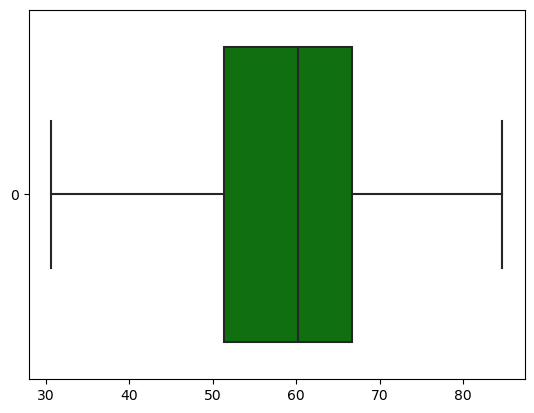

In [24]:
import seaborn as sea
sea.boxplot(budget.EJECUCION_DIC_2024, color='green', orient='h')
#Many atypical values

### Correlación espacial

In [25]:
from libpysal.weights import Queen, Rook, KNN
w_rook=Rook.from_dataframe(budget,use_index=False)
w_queen=Queen.from_dataframe(budget,use_index=False)
w_knn=KNN.from_dataframe(budget,k=8)

### Correlación Moran (correlación espacial)

In [26]:
w_queen.transform = 'R' 

In [27]:
pd.DataFrame(*w_queen.full()).sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
191    1.0
192    1.0
193    1.0
194    1.0
195    1.0
Length: 196, dtype: float64

In [28]:
from esda.moran import Moran
moranBUDGET = Moran(budget['EJECUCION_DIC_2024'], w_queen)
moranBUDGET.I, moranBUDGET.p_sim

(0.27610055414713847, 0.001)

Text(0.5, 1.0, 'Moran Scatter Plot for Execution of the 2024 budget Peru')

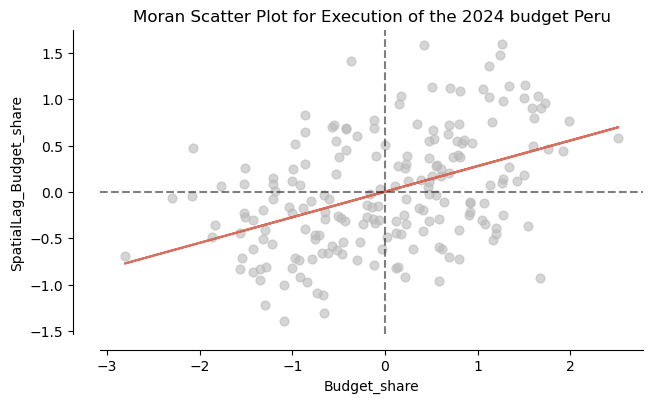

In [29]:
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

fig, ax = moran_scatterplot(moranBUDGET)
ax.set_xlabel('Budget_share')
ax.set_ylabel('SpatialLag_Budget_share')
ax.set_title('Moran Scatter Plot for Execution of the 2024 budget Peru')

Text(0.5, 1.0, 'Moran Scatter Plot for Execution of the 2024 budget Peru')

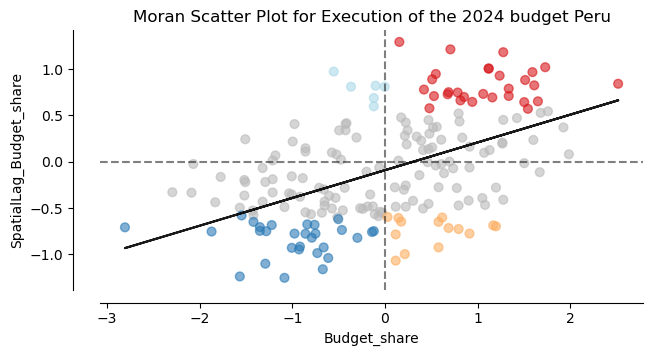

In [30]:
from esda.moran import Moran_Local #AKA LISA
LISABUDGET_2024= Moran_Local(y=budget['EJECUCION_DIC_2024'], w=w_knn,seed=2024)
fig, ax= moran_scatterplot(LISABUDGET_2024, p=0.05)
ax.set_xlabel('Budget_share')
ax.set_ylabel('SpatialLag_Budget_share')
ax.set_title('Moran Scatter Plot for Execution of the 2024 budget Peru')

<Figure size 800x800 with 0 Axes>

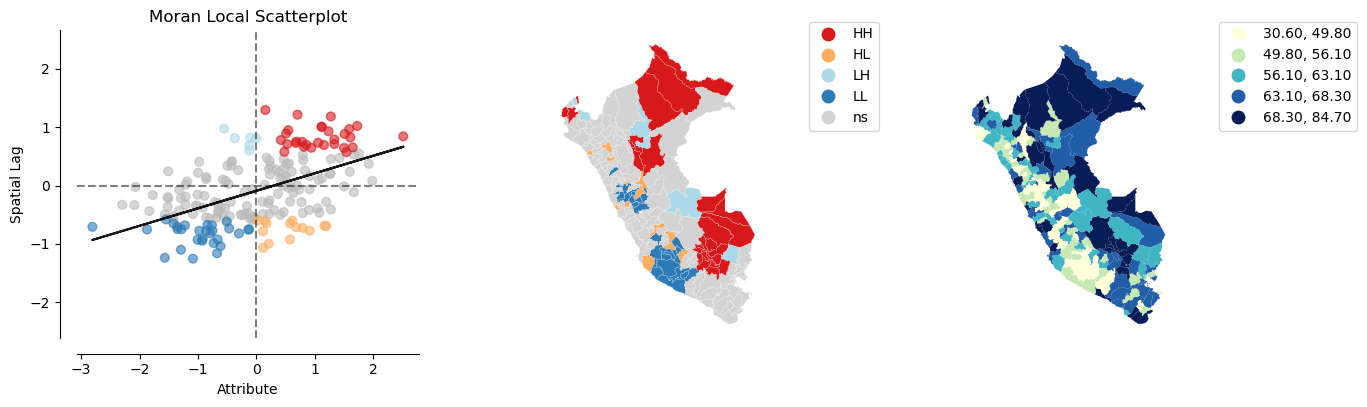

In [31]:
#import matplotlib
#matplotlib.use('Agg')  # Usa el backend adecuado para guardar la imagen sin una GUI

from splot.esda import plot_local_autocorrelation
plt.figure(figsize=(8, 8))
plot_local_autocorrelation(LISABUDGET_2024, budget,'EJECUCION_DIC_2024')
plt.show()

In [32]:
# plt.savefig("local_autocorrelation_BUDGET_2024.png", dpi=300, bbox_inches="tight")

In [33]:
LISABUDGET_2024.q

array([3, 1, 3, 1, 3, 2, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 4, 3, 4, 1, 4, 4, 3, 1, 3, 2, 1, 4, 3, 2, 1, 3, 1, 3, 4, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 1, 4, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 2, 4, 3, 3, 4, 4,
       3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 4, 4, 2, 1,
       1, 1, 4, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3,
       1, 2, 1, 1, 1, 1, 1, 2, 4, 1, 2, 4, 4, 2, 2, 1, 1, 1, 1, 1, 2, 4,
       1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 2, 1, 2, 2, 1, 1, 4, 2, 2, 1])

In [34]:
LISABUDGET_2024.p_sim

array([0.262, 0.1  , 0.462, 0.095, 0.427, 0.354, 0.118, 0.066, 0.039,
       0.004, 0.098, 0.014, 0.011, 0.085, 0.1  , 0.181, 0.015, 0.058,
       0.172, 0.269, 0.084, 0.047, 0.136, 0.003, 0.15 , 0.076, 0.097,
       0.123, 0.001, 0.352, 0.162, 0.026, 0.016, 0.137, 0.234, 0.14 ,
       0.008, 0.262, 0.492, 0.187, 0.113, 0.022, 0.003, 0.003, 0.001,
       0.034, 0.01 , 0.001, 0.003, 0.003, 0.001, 0.001, 0.016, 0.221,
       0.022, 0.048, 0.099, 0.075, 0.177, 0.017, 0.478, 0.493, 0.144,
       0.065, 0.182, 0.077, 0.281, 0.009, 0.001, 0.015, 0.004, 0.004,
       0.013, 0.022, 0.023, 0.132, 0.007, 0.003, 0.005, 0.006, 0.017,
       0.225, 0.062, 0.314, 0.287, 0.017, 0.209, 0.031, 0.01 , 0.023,
       0.079, 0.086, 0.01 , 0.306, 0.015, 0.248, 0.005, 0.002, 0.046,
       0.229, 0.032, 0.047, 0.136, 0.021, 0.473, 0.098, 0.329, 0.171,
       0.231, 0.233, 0.435, 0.089, 0.09 , 0.058, 0.483, 0.013, 0.124,
       0.219, 0.052, 0.09 , 0.078, 0.174, 0.149, 0.118, 0.079, 0.125,
       0.381, 0.246,

In [35]:
#how many provinces per quadrant
pd.Series(LISABUDGET_2024.q).value_counts() 

3    75
1    61
4    39
2    21
Name: count, dtype: int64

In [36]:
budget['BUDGET_QUADRANT_2024']=[l if p <0.05 else 0 for l,p in zip(LISABUDGET_2024.q,LISABUDGET_2024.p_sim)]
budget['BUDGET_QUADRANT_2024'].value_counts()

BUDGET_QUADRANT_2024
0    118
3     29
1     29
4     14
2      6
Name: count, dtype: int64

In [37]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

budget['BUDGET_Q_NAMES_2024']=[labels[i] for i in budget['BUDGET_QUADRANT_2024']]

budget['BUDGET_Q_NAMES_2024'].value_counts()

BUDGET_Q_NAMES_2024
0 no_sig         118
3 coldSpot        29
1 hotSpot         29
4 hotOutlier      14
2 coldOutlier      6
Name: count, dtype: int64

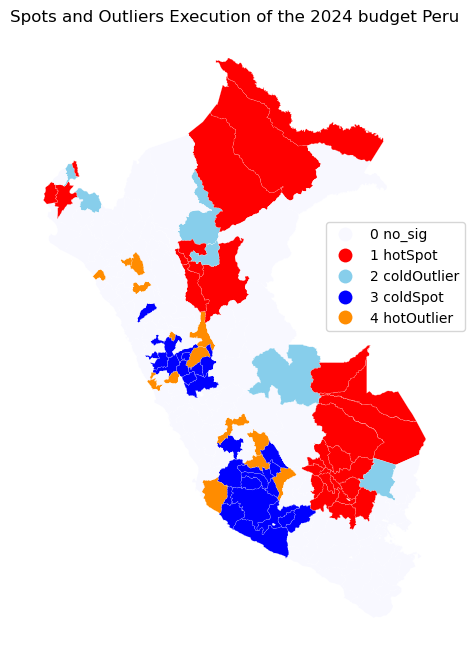

In [38]:
from matplotlib import colors
colormap= colors.ListedColormap([ 'ghostwhite', 'red', 'skyblue', 'blue','darkorange'])

f, ax = plt.subplots(1, figsize=(8,8))
plt.title('Spots and Outliers Execution of the 2024 budget Peru')
budget.plot(column='BUDGET_Q_NAMES_2024',
                categorical=True,
                cmap=colormap,
                linewidth=0.1,
                edgecolor='white',
                legend=True,
                legend_kwds={'loc': 'center left',
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
ax.set_axis_off()
plt.show()

In [39]:
#plt.savefig("Spots_outliers_BUDGET_2024.png", dpi=300, bbox_inches="tight")

### Ejecución presupuestal por quintiles

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los intervalos de ejecución (en base a percentiles)
intervalos = [0, 20, 40, 60, 80, 100]

# Crear un mapa de colores según esos intervalos
cmap = plt.get_cmap("YlGnBu")  # Puedes elegir otro mapa de colores

# Usar 'intervalos' para asignar colores a cada provincia
budget['color'] = pd.cut(budget['EJECUCION_DIC_2024'], bins=intervalos, labels=np.arange(len(intervalos)-1))

In [47]:
# Graficar el mapa con los colores definidos
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

budget.plot(column='color', cmap=cmap, legend=True, ax=ax,
         legend_kwds={'title': 'Porcentaje de Ejecución',
                       'labels': ['< 20%', '20 - < 40%', '40 - < 60%', '60 - < 80%', '80% +'],
                         'loc': 'upper left', 'bbox_to_anchor': (1, 1)})  # Posición de la leyenda
ax.axis("off")

ax.set_title("Porcentaje de Ejecución Presupuestal por Provincia al 1ero diciembre del 2024")

plt.show()


C:\Users\ALEXANDRA\AppData\Local\Temp\ipykernel_2528\2560134102.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [48]:
#plt.savefig("Execution_BUDGET_2024.png", dpi=300, bbox_inches="tight")

### PIM asignado 

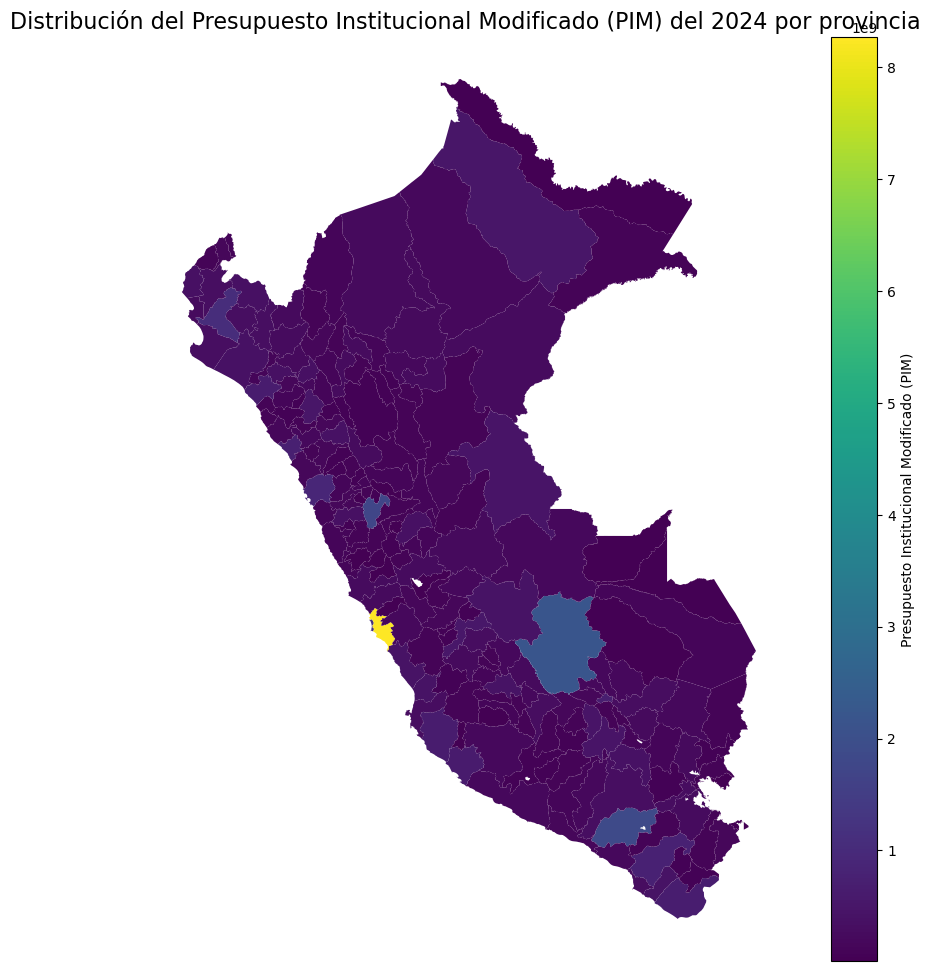

In [43]:
# Crear una figura para el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Crear un mapa de coropletas basado en el PIM (monto total asignado)
budget.plot(column='PIM_2024', 
            cmap='viridis',  # Paleta de colores (puedes usar otras como 'YlGnBu', 'plasma', etc.)
            legend=True, 
            ax=ax, 
            legend_kwds={'label': "Presupuesto Institucional Modificado (PIM)",
                         'orientation': "vertical"})

# Desactivar los ejes
ax.axis("off")

# Agregar un título al mapa
ax.set_title("Distribución del Presupuesto Institucional Modificado (PIM) del 2024 por provincia ", fontsize=16)

# Mostrar el gráfico
plt.show()

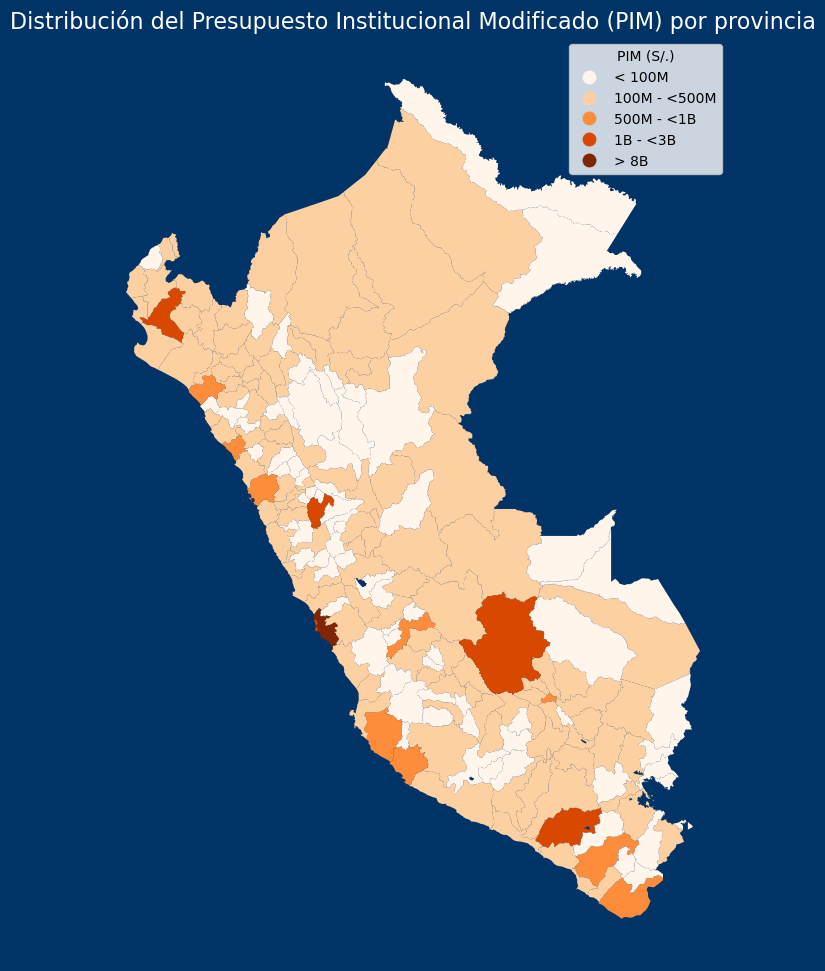

In [44]:
# Definir los intervalos personalizados para PIM
bins = [0, 100000000, 500000000, 1000000000, 3000000000, budget['PIM_2024'].max()]
labels = ["< 100M", "100M - <500M", "500M - <1B", "1B - <3B", "> 8B"]

# Crear la columna con los intervalos
budget['PIM_bins'] = pd.cut(budget['PIM_2024'], bins=bins, labels=labels, include_lowest=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

fig.patch.set_facecolor("#003366")  # Fondo oscuro de la figura
ax.set_facecolor("#003366")         # Fondo oscuro del área del eje


budget.plot(column='PIM_bins', 
            cmap='Oranges',  # Paleta de colores 
            legend=True, 
            ax=ax, 
            legend_kwds={'title': "PIM (S/.)"})

ax.axis("off") # Desactivar los ejes


ax.set_title("Distribución del Presupuesto Institucional Modificado (PIM) por provincia", fontsize=16, color="white") # Agregar un título al gráfico

plt.show() # Mostrar el gráfico


In [45]:
#plt.savefig("PIM_BUDGET_2024.png", dpi=300, bbox_inches="tight")